In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'WenQuanYi Zen Hei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# target = "nonlinear_result"

if target == "all_data":
    model_name = "RealData"
elif target == "linear_result":
    model_name = "LinearRegression"
elif target == "nonlinear_result":
    model_name = "NonlinearRegression"

hat = "" if target == "all_data" else "pre_"

In [3]:
# 构建文件名
price_file = f"Price_{target}.csv"
rent_file = f"Rent_{target}.csv"

# 读取房价和租金数据
price_df = pd.read_csv(price_file)
rent_df = pd.read_csv(rent_file)

price_median = price_df.groupby('location')[[f'{hat}Price']].median()
price_median_lst = price_median[f'{hat}Price'].tolist()
rent_median = rent_df.groupby('location')[[f'{hat}Rent']].median()
rent_median_lst = rent_median[f'{hat}Rent'].tolist()

ratio_lst = [price_median_lst[i]/rent_median_lst[i] for i in range(len(price_median_lst))]

In [4]:
# 添加三个标准比值
international_standard = 200
china_standard = 615
beijing_standard = 662

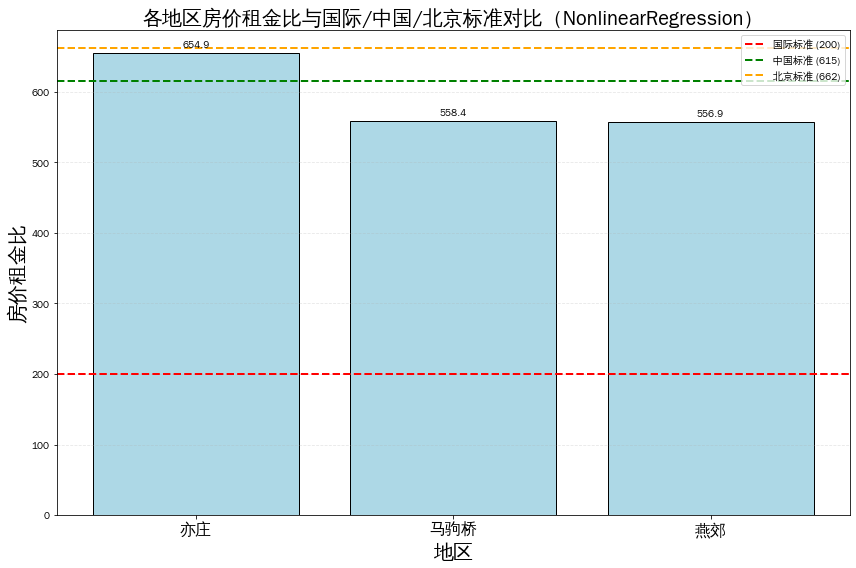

In [5]:
# 创建图形
plt.figure(figsize=(12, 8))

# 只绘制各地区的房价租金比的柱状图（不包含三个标准值）
bars = plt.bar(range(len(ratio_lst)), ratio_lst, color='lightblue', edgecolor='black')

# 添加三条标准水平线
plt.axhline(y=international_standard, color='red', linestyle='--', linewidth=2, label=f'国际标准 ({international_standard})')
plt.axhline(y=china_standard, color='green', linestyle='--', linewidth=2, label=f'中国标准 ({china_standard})')
plt.axhline(y=beijing_standard, color='orange', linestyle='--', linewidth=2, label=f'北京标准 ({beijing_standard})')

# 添加标签和标题
plt.xlabel('地区', fontsize=20)
plt.ylabel('房价租金比', fontsize=20)
plt.title(f'各地区房价租金比与国际/中国/北京标准对比（{model_name}）', fontsize=20, fontweight='bold')

# 设置x轴标签（只显示地区名称，不显示标准值）
block_name = ["亦庄", "马驹桥", "燕郊"]
plt.xticks(ticks=range(len(ratio_lst)), labels=block_name, size=16)

# 在柱子上方添加数值标签
for i, (bar, ratio) in enumerate(zip(bars, ratio_lst)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{ratio:.1f}', ha='center', va='bottom', fontsize=10)

# 添加图例（简化图例，因为水平线已经有标签）
plt.legend(loc='upper right')

# 添加网格线使数值更易读
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 调整布局防止标签被截断
plt.tight_layout()

# 显示图表
plt.show()